<a href="https://colab.research.google.com/github/kangkwanghyup/2022test/blob/main/CNC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%85%8B_%EC%A0%9C%EC%A1%B0_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_KAMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
from __future__ import print_function
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
import keras
import os, sys, math, copy
import scipy.io as sio
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import InputSpec
#from keras.engine import Layer, InputSpec
from keras.optimizers import RMSprop, SGD, Adam
from keras import initializers, regularizers, constraints
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, History
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras import backend as k
from keras.utils import np_utils
sys.setrecursionlimit(10000)

import matplotlib.pyplot as plt

훈련 데이터 셋 불러오기기

In [ ]:
train_sample = pd.read_csv("/content/drive/MyDrive/제조 kamp/CNC 데이터/train.csv", header=0 , encoding = 'utf-8')
path = "/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2"
all_files = glob.glob(path+ '/*.csv')
train_sample_np = np.array(train_sample.copy())

li_df=[]
for filename in all_files:
  df = pd.read_csv(filename, index_col=None, header=0)
  li_df.append(df)

In [ ]:
train_sample_np

array([[1, 'aluminum', 6, 4.0, 'unworn', 'yes', 'yes'],
       [2, 'aluminum', 20, 4.0, 'unworn', 'yes', 'yes'],
       [3, 'aluminum', 6, 3.0, 'unworn', 'yes', 'yes'],
       [4, 'aluminum', 6, 2.5, 'unworn', 'no', nan],
       [5, 'aluminum', 20, 3.0, 'unworn', 'no', nan],
       [6, 'aluminum', 6, 4.0, 'worn', 'yes', 'no'],
       [7, 'aluminum', 20, 4.0, 'worn', 'no', nan],
       [8, 'aluminum', 20, 4.0, 'worn', 'yes', 'no'],
       [9, 'aluminum', 15, 4.0, 'worn', 'yes', 'no'],
       [10, 'aluminum', 12, 4.0, 'worn', 'yes', 'no'],
       [11, 'aluminum', 3, 4.0, 'unworn', 'yes', 'yes'],
       [12, 'aluminum', 3, 3.0, 'unworn', 'yes', 'yes'],
       [13, 'aluminum', 3, 4.0, 'worn', 'yes', 'yes'],
       [14, 'aluminum', 3, 3.0, 'worn', 'yes', 'yes'],
       [15, 'aluminum', 6, 3.0, 'worn', 'yes', 'yes'],
       [16, 'aluminum', 20, 3.0, 'worn', 'no', nan],
       [17, 'aluminum', 3, 2.5, 'unworn', 'yes', 'yes'],
       [18, 'aluminum', 3, 2.5, 'worn', 'yes', 'yes'],
       [19, 

In [ ]:
train_sample

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,aluminum,6,4.0,unworn,yes,yes
1,2,aluminum,20,4.0,unworn,yes,yes
2,3,aluminum,6,3.0,unworn,yes,yes
3,4,aluminum,6,2.5,unworn,no,NaN
4,5,aluminum,20,3.0,unworn,no,NaN
5,6,aluminum,6,4.0,worn,yes,no
6,7,aluminum,20,4.0,worn,no,NaN
7,8,aluminum,20,4.0,worn,yes,no
8,9,aluminum,15,4.0,worn,yes,no
9,10,aluminum,12,4.0,worn,yes,no


In [ ]:
li_df

[      X_ActualPosition  X_ActualVelocity  X_ActualAcceleration  X_SetPosition  \
 0                  202             4.000                  4.00            202   
 1                  202            -6.800               -346.00            202   
 2                  200           -13.800                 -2.25            200   
 3                  198           -14.000                  4.00            198   
 4                  197           -13.900                -14.80            196   
 ...                ...               ...                   ...            ...   
 1050               145             4.175                 91.50            145   
 1051               145             3.850                -83.50            145   
 1052               145             3.825                -83.50            145   
 1053               145             4.150                 91.50            145   
 1054               145             4.175                 97.70            145   
 
       X_SetVe

In [ ]:
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,149,7.970,17.50,149,7.960,5.536,4.16,0.0585,326,8.07,...,16.3,0.741,324,115.0,0.139,17,1,2,3,Prep
1,149,8.100,5.00,149,8.000,5.145,1.80,0.0716,327,11.00,...,27.9,0.968,323,120.0,0.183,17,1,69,3,Prep
2,149,7.920,36.30,149,8.000,5.000,4.19,0.0890,327,11.20,...,19.4,0.990,323,116.0,0.192,17,1,69,3,Prep
3,150,7.900,11.25,150,8.000,5.000,5.05,0.0883,327,10.20,...,16.5,0.752,324,115.0,0.143,17,1,71,3,Prep
4,150,8.000,30.00,150,8.000,5.000,3.35,0.0607,327,8.51,...,26.7,1.000,323,120.0,0.191,17,1,71,3,Prep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,167,5.200,30.00,167,5.133,1.570,2.19,0.0639,327,7.28,...,24.2,0.844,324,118.0,0.162,17,1,123,3,End
2229,167,5.125,73.70,167,5.000,5.000,1.11,0.0511,327,4.99,...,25.5,0.871,324,117.0,0.166,17,1,123,3,End
2230,167,5.100,61.30,167,5.000,5.000,1.66,0.0536,327,4.81,...,18.4,0.956,324,118.0,0.183,17,1,123,3,End
2231,167,5.125,67.50,167,5.000,5.000,2.77,0.0494,327,3.02,...,23.8,0.922,324,116.0,0.178,17,1,123,3,End


In [ ]:
print(all_files)

['/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_01.csv', '/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_03.csv', '/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_02.csv', '/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_17.csv', '/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_20.csv', '/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_16.csv', '/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_23.csv', '/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_25.csv', '/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_21.csv', '/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_06.csv', '/content/drive/MyDrive/제조 kamp/CNC 데이터/CNC Virtual Data set _v2/experiment_24.csv', '/content

In [ ]:
nb_pass=0
nb_pass_half=0
nb_defective=0

for i in range(len(train_sample_np)):
  if train_sample_np[i,5]=='no':
    nb_defective +=1
  if train_sample_np[i,5]=='yes' and train_sample_np[i,6]=='yes':
    nb_pass +=1
  if train_sample_np[i,5]=='yes' and train_sample_np[i,6]=='no':
    nb_pass_half +=1
    
print('양품 샘플 개수: ', nb_pass)
print('공정 마쳤으나 육안검사 통과 못한 샘플개수: ', nb_pass_half)
print('공정 중지된샘플 개수: ', nb_defective)
print('전체 샘플 개수: ', nb_pass + nb_pass_half + nb_defective)

양품 샘플 개수:  13
공정 마쳤으나 육안검사 통과 못한 샘플개수:  6
공정 중지된샘플 개수:  6
전체 샘플 개수:  25


사용자 함수선언언

In [ ]:
def tool_condition(input):
  for i in range(len(input)):
    if input[i,4]=='unworn':
      input[i,4]=0
    else:
      input[i,4]=1
  return input

In [ ]:
def item_inspection(input):
  for i in range(len(input)):
    if input[i,5]=='no':
      input[i,6]=2
    elif input[i,5]=='yes' and  input[i,6]=='no' :
      input[i,6]=1
    elif input[i,5]=='yes' and  input[i,6]=='yes' :
      input[i,6]=0
  return input

In [ ]:
def machininig_process(input):
  for i in range(len(input)):
    if input[i,47]=='Prep':
      input[i,47]=0
    elif input[i,47]=='Layer 1 Up':
      input[i,47]=1
    elif input[i,47]=='Layer 1 Down':
      input[i,47]=2
    elif input[i,47]=='Layer 2 Up':
      input[i,47]=3
    elif input[i,47]=='Layer 2 Down':
      input[i,47]=4
    elif input[i,47]=='Layer 3 Up':
      input[i,47]=5
    elif input[i,47]=='Layer 3 Down':
      input[i,47]=6
    elif input[i,47]=='Repositioning':
      input[i,47]=7
    elif input[i,47]=='End'or'end':
      input[i,47]=8
    elif input[i,47]=='Starting':
      input[i,47]=9
  return input

In [ ]:
train_sample_info = np.array(train_sample_np.copy())
train_sample_info = tool_condition(train_sample_info)
train_sample_info = item_inspection(train_sample_info)
print(train_sample_info)

[[1 'aluminum' 6 4.0 0 'yes' 0]
 [2 'aluminum' 20 4.0 0 'yes' 0]
 [3 'aluminum' 6 3.0 0 'yes' 0]
 [4 'aluminum' 6 2.5 0 'no' 2]
 [5 'aluminum' 20 3.0 0 'no' 2]
 [6 'aluminum' 6 4.0 1 'yes' 1]
 [7 'aluminum' 20 4.0 1 'no' 2]
 [8 'aluminum' 20 4.0 1 'yes' 1]
 [9 'aluminum' 15 4.0 1 'yes' 1]
 [10 'aluminum' 12 4.0 1 'yes' 1]
 [11 'aluminum' 3 4.0 0 'yes' 0]
 [12 'aluminum' 3 3.0 0 'yes' 0]
 [13 'aluminum' 3 4.0 1 'yes' 0]
 [14 'aluminum' 3 3.0 1 'yes' 0]
 [15 'aluminum' 6 3.0 1 'yes' 0]
 [16 'aluminum' 20 3.0 1 'no' 2]
 [17 'aluminum' 3 2.5 0 'yes' 0]
 [18 'aluminum' 3 2.5 1 'yes' 0]
 [19 'aluminum' 15 4.0 1 'yes' 1]
 [20 'aluminum' 12 4.0 0 'no' 2]
 [21 'aluminum' 3 4.0 0 'yes' 1]
 [22 'aluminum' 20 3.0 1 'yes' 0]
 [23 'aluminum' 3 4.0 1 'no' 2]
 [24 'aluminum' 3 3.0 0 'yes' 0]
 [25 'aluminum' 6 2.5 1 'yes' 0]]


In [ ]:
train_sample_info=np.delete(train_sample_info,5,axis=1)
train_sample_info=np.delete(train_sample_info,0,axis=1)
train_sample_info=np.delete(train_sample_info,0,axis=1)
print(train_sample_info)

[[6 4.0 0 0]
 [20 4.0 0 0]
 [6 3.0 0 0]
 [6 2.5 0 2]
 [20 3.0 0 2]
 [6 4.0 1 1]
 [20 4.0 1 2]
 [20 4.0 1 1]
 [15 4.0 1 1]
 [12 4.0 1 1]
 [3 4.0 0 0]
 [3 3.0 0 0]
 [3 4.0 1 0]
 [3 3.0 1 0]
 [6 3.0 1 0]
 [20 3.0 1 2]
 [3 2.5 0 0]
 [3 2.5 1 0]
 [15 4.0 1 1]
 [12 4.0 0 2]
 [3 4.0 0 1]
 [20 3.0 1 0]
 [3 4.0 1 2]
 [3 3.0 0 0]
 [6 2.5 1 0]]


In [ ]:
k = 0
li_pass=[]
li_pass_half=[]
li_fail=[]

for filename in all_files:
  df = pd.read_csv(filename, index_col=None, header=0)

  if train_sample_info[k,3]==0:
    li_pass.append(df)
  elif train_sample_info[k,3]==1:
    li_pass_half.append(df)
  else:
    li_fail.append(df)

  k+=1

frame01=pd.concat(li_pass, axis=0, ignore_index=True)
frame02=pd.concat(li_pass_half, axis=0, ignore_index=True)
frame03=pd.concat(li_fail, axis=0, ignore_index=True)

data_pass=np.array(frame01.copy())
data_pass_half=np.array(frame02.copy())
data_fail=np.array(frame03.copy())

In [ ]:
print('공정 완료 및 육안검사 합격한 전체 데이터 수 :', len(data_pass))
print('공정 완료 및 육안검사 불합격한 전체 데이터 수 :', len(data_pass_half))
print('공정 미완료한 전체 데이터 수 :', len(data_fail))

공정 완료 및 육안검사 합격한 전체 데이터 수 : 17564
공정 완료 및 육안검사 불합격한 전체 데이터 수 : 6117
공정 미완료한 전체 데이터 수 : 8367


In [ ]:
print(data_pass.shape) #양품 합격품
print(data_pass_half.shape) #불합격
print(data_fail.shape) #공정미완료료

(17564, 48)
(6117, 48)
(8367, 48)


In [ ]:
data_pass= machininig_process(data_pass)
data_pass_half= machininig_process(data_pass_half)
data_fail= machininig_process(data_fail)


In [ ]:
data01= data_pass[0:6117+8367,:] #양품 중에서 불량품 뽑는다
data02= data_pass_half[0:6117,:]  #육안 불량
data03= data_fail[0:8367,:]    #공정불량량

data=np.concatenate((data01,data02),axis=0);
data=np.concatenate((data,data03),axis=0);  #전체 데이터 합친거
data_all=data_pass[6117+8367:17564,:]    #학습 완료후 평가에 사용할 남은 데이터셋 pass 에 샘플 데이터 

print(data)
print(data.shape)
print(data_all.shape)

[[202.0 4.0 4.0 ... 0 50 8]
 [202.0 -6.8 -346.0 ... 4 50 0]
 [200.0 -13.8 -2.25 ... 7 50 0]
 ...
 [146.0 0.8 84.2 ... 57 3 8]
 [146.0 0.95 71.7 ... 57 3 8]
 [146.0 0.85 -65.7 ... 57 3 8]]
(28968, 48)
(3080, 48)


In [ ]:
sc=MinMaxScaler()
X_train = sc.fit_transform(data)
X_train = np.array(X_train)
X_test = sc.fit_transform(data_all)
X_test  = np.array(X_test)

In [ ]:
Y_train = np.zeros((len(X_train),1), dtype='int')
Y_test = np.zeros((len(X_test),1), dtype='int')
I = int(Y_train.shape[0]/2)
Y_train[0:I,:]=0
Y_train[I:I*2,:]=1
print(Y_train)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
#AI 모델 구축축

SyntaxError: ignored

In [ ]:
nb_classes =2
batch_size=1024
epochs =300
lr =1e-4

In [ ]:
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test =  np_utils.to_categorical(Y_test, nb_classes)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(28968, 48)
(3080, 48)
(28968, 2)
(3080, 2)


In [ ]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim =48))
model.add(Dropout(0.3))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(265, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(nb_classes, activation='sigmoid'))
model_checkpoint= ModelCheckpoint('weight_cnc_binary.mat', monitor = 'val_acc',save_best_only=True)

opt=Adam(lr)

model.summary()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history=History()
print('............modl is defined............')


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               6272      
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               33024     
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 512)               131584    
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 512)              

In [ ]:
model.fit(X_train, Y_train, verbose=2, batch_size = batch_size, epochs = epochs, validation_split =0.1 , shuffle=True , callbacks=[history])
model.save_weights('weight_cnc_binary.mat')

Epoch 1/300
26/26 - 2s - loss: 0.2207 - accuracy: 0.8783 - val_loss: 52.1802 - val_accuracy: 0.0967 - 2s/epoch - 87ms/step
Epoch 2/300
26/26 - 2s - loss: 0.2198 - accuracy: 0.8781 - val_loss: 53.4924 - val_accuracy: 0.0925 - 2s/epoch - 82ms/step
Epoch 3/300
26/26 - 2s - loss: 0.2226 - accuracy: 0.8768 - val_loss: 53.2574 - val_accuracy: 0.0953 - 2s/epoch - 83ms/step
Epoch 4/300
26/26 - 2s - loss: 0.2220 - accuracy: 0.8758 - val_loss: 53.9786 - val_accuracy: 0.0925 - 2s/epoch - 82ms/step
Epoch 5/300
26/26 - 2s - loss: 0.2199 - accuracy: 0.8770 - val_loss: 51.8424 - val_accuracy: 0.0973 - 2s/epoch - 83ms/step
Epoch 6/300
26/26 - 2s - loss: 0.2226 - accuracy: 0.8762 - val_loss: 51.5707 - val_accuracy: 0.1004 - 2s/epoch - 83ms/step
Epoch 7/300
26/26 - 2s - loss: 0.2193 - accuracy: 0.8756 - val_loss: 52.2217 - val_accuracy: 0.0956 - 2s/epoch - 82ms/step
Epoch 8/300
26/26 - 2s - loss: 0.2212 - accuracy: 0.8773 - val_loss: 51.6673 - val_accuracy: 0.0873 - 2s/epoch - 82ms/step
Epoch 9/300
26/2

In [ ]:
loss_and_metrics= model.evaluate(X_train, Y_train, batch_size=32)
print(loss_and_metrics)

loss_and_metrics2= model.evaluate(X_test, Y_test, batch_size=32)
print(loss_and_metrics2)


906/906 [==============================] - 3s 3ms/step - loss: 5.8796 - accuracy: 0.8069
[5.879602909088135, 0.8068558573722839]
97/97 [==============================] - 0s 3ms/step - loss: 6.3484 - accuracy: 0.2195
[6.3484272956848145, 0.2194805145263672]


<ipython-input-73-7305c4ac4726>:7: UserWarning: Legend does not support 'V' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Validation Accuracy', 'Training Accuracy')
<ipython-input-73-7305c4ac4726>:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Validation Accuracy', 'Training Accuracy')
<ipython-input-73-7305c4ac4726>:7: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Validation Accuracy', 'Training Accuracy')
<ipython-input-73-7305c4ac4726>:7: UserWarning: Legend does not support 'i' instances.
A

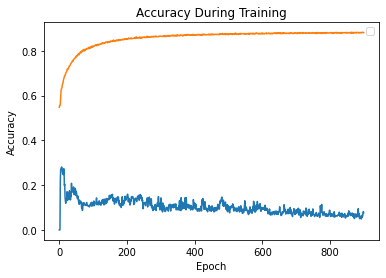

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend('Validation Accuracy', 'Training Accuracy')
plt.show()


<ipython-input-74-9d06bfc7e08e>:7: UserWarning: Legend does not support 'V' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Validation Loss', 'Training Loss')
<ipython-input-74-9d06bfc7e08e>:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Validation Loss', 'Training Loss')
<ipython-input-74-9d06bfc7e08e>:7: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Validation Loss', 'Training Loss')
<ipython-input-74-9d06bfc7e08e>:7: UserWarning: Legend does not support 'i' instances.
A proxy artist may be use

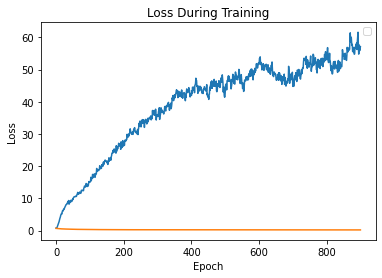

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend('Validation Loss', 'Training Loss')
plt.show()
